# AdaBoost Regression — Advanced Theory & Interview Q&A

## Advanced Theory

- **Boosting:** Sequentially combines weak learners, focusing on samples with higher errors.
- **Weighted Samples:** Increases weights for samples with higher errors in each iteration.
- **Weak Learners:** Often decision stumps (trees with one split).
- **Learning Rate:** Controls contribution of each weak learner.
- **Extensions:** AdaBoost Classification, Gradient Boosting, XGBoost.
- **Diagnostics:** RMSE, R², residual analysis, feature importance plots.
- **Limitations:** Sensitive to noisy data and outliers.

## Advanced Interview Q&A

**Q1: How does AdaBoost Regression improve accuracy?**  
A: By focusing on samples with higher errors and combining weak learners.

**Q2: What is the role of learning rate in AdaBoost Regression?**  
A: Controls contribution of each weak learner; lower values slow learning, reduce overfitting.

**Q3: What is the difference between AdaBoost and Gradient Boosting?**  
A: AdaBoost uses exponential loss, Gradient Boosting uses arbitrary differentiable loss.

**Q4: How do you assess model fit?**  
A: Use RMSE, R², residual analysis, feature importance plots.

**Q5: What are the limitations of AdaBoost Regression?**  
A: Sensitive to noisy data and outliers.

**Q6: How do you tune hyperparameters in AdaBoost Regression?**  
A: Use grid search, cross-validation for n_estimators, learning_rate.

**Q7: What is the bias-variance tradeoff in AdaBoost Regression?**  
A: Boosting reduces bias, but can increase variance if overfitting.

**Q8: What is the impact of weak learner choice?**  
A: Stronger learners can overfit; decision stumps are common.

**Q9: How do you handle missing values in AdaBoost Regression?**  
A: Impute missing values or use learners that handle them natively.

**Q10: How do you handle outliers in AdaBoost Regression?**  
A: Use robust learners or preprocessing to remove outliers.

# AdaBoost Regression — Theory & Interview Q&A

AdaBoost Regression is an ensemble learning method that combines weak learners to predict continuous outcomes, focusing on samples with higher errors.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Combines weak learners, focusing on errors to improve regression.        |
| **Equation**          | Weighted sum of weak learners                                          |
| **Use Cases**         | Price prediction, time series, environmental modeling                   |
| **Assumptions**       | Weak learners perform slightly better than random guessing              |
| **Pros**              | Improves accuracy, reduces bias, interpretable weights                  |
| **Cons**              | Sensitive to noisy data and outliers                                   |
| **Key Parameters**    | n_estimators, learning_rate                                            |
| **Evaluation Metrics**| MSE, RMSE, R² Score                                                     |

## Interview Q&A

**Q1: What is AdaBoost Regression?**  
A: An ensemble method that combines weak learners, focusing on samples with higher errors.

**Q2: How does AdaBoost Regression work?**  
A: It increases weights for samples with higher errors and combines weak learners.

**Q3: What is a weak learner?**  
A: A model that performs slightly better than random guessing (often a decision stump).

**Q4: What are the advantages of AdaBoost Regression?**  
A: Improves accuracy, reduces bias, interpretable weights.

**Q5: What are the limitations?**  
A: Sensitive to noisy data and outliers.

**Q6: How do you evaluate AdaBoost Regression?**  
A: Using MSE, RMSE, and R² score.

Best Parameters: {'ab__learning_rate': 0.1, 'ab__n_estimators': 50}
R2 Score: 0.5687991475393247
Mean Squared Error: 0.5650494684895984


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_13408\3667982780.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')


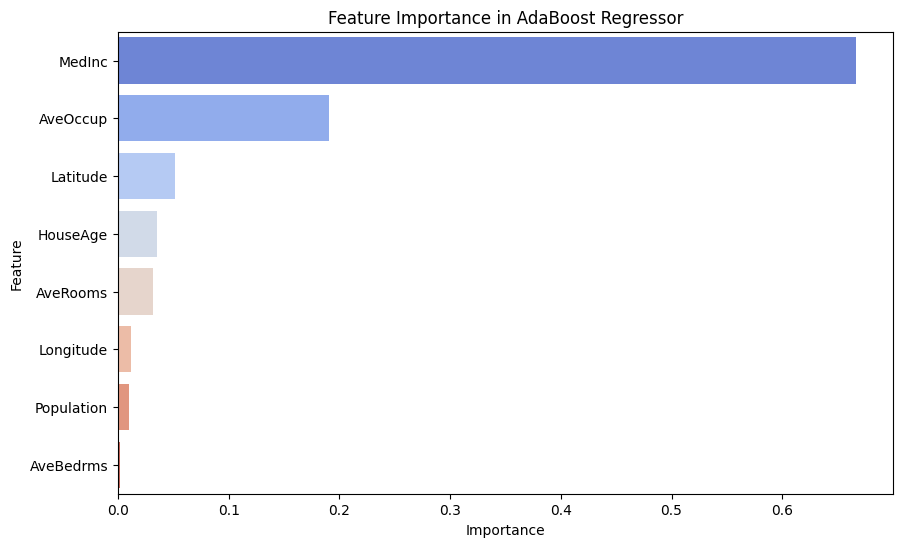

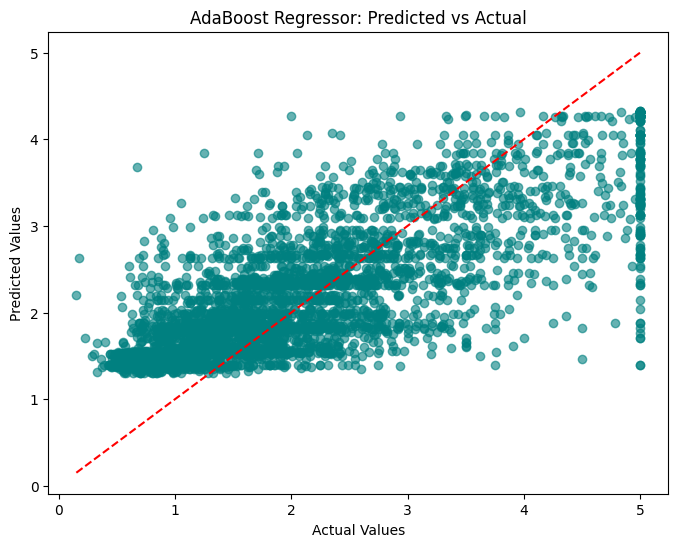

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Create Pipeline with Weak Learner
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional
    ('ab', AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                             random_state=42))
])

# 5️⃣ Hyperparameter Tuning
param_grid = {
    'ab__n_estimators': [50, 100, 200],
    'ab__learning_rate': [0.01, 0.1, 0.5, 1],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 6️⃣ Evaluate Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 7️⃣ Feature Importance Visualization
importances = best_model.named_steps['ab'].feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')
plt.title("Feature Importance in AdaBoost Regressor")
plt.show()

# 8️⃣ Predicted vs Actual Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("AdaBoost Regressor: Predicted vs Actual")
plt.show()
